## Building on the coin flip example

A coin flip can be modeled by the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).

Let's make a [PyMC](https://www.pymc.io/) model of coin flipping. This is a *statistical model*, not necessarily a physical model. Our model asserts that with each flip, we observe a sample from a Bernoulli distribution. The Bernoulli distribution has a single parameter *p*, the probability of getting a `1` (or, in our case, a head side up). In our model, we will assert that each flip samples from a parent distribution specifying our beliefs about the coin. For example, the parent distribution represents our belief about whether the is fair. If we predict the coin will result with a 50/50 chance of heads, the distribution should peak at 0.5. The parent distribution also represents our belief about how certain we are. A narrow distribution means we are very certain. A broad distribution means we are very uncertain.

We use the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) as the parent distribution. The reasons for using the beta distribution as the "conjugate prior" for the Bernoulli distribution are explained nicely in the [conjugate prior Wikipedia page](https://en.wikipedia.org/wiki/Conjugate_prior) although beyond the level of detail we will discuss in class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pymc as pm
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v4.0.0


In [2]:
# Here are our observations of the coin flip process. True is "heads".
# Y = [True, True, False, False, True, False, True, True, False, True, True, False]
Y = [False]*1000
# Y[0] = True
# Y[1] = True
# Y[2] = True
# Y

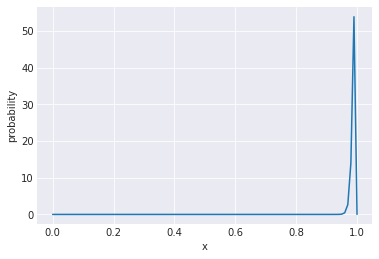

In [3]:
bernoulli_model = pm.Model()

alpha = 200
beta = 2

with bernoulli_model:
    p = pm.Beta('p', alpha=alpha, beta=beta)
    Y_obs = pm.Bernoulli('flip', p=p, observed=Y)
    
# Let's look at a beta distribution with these parameters
#pm.kdeplot(np.random.beta(a=alpha, b=beta, size=10000), fill_kwargs={'alpha': 0.5});
x = np.linspace(0,1,100)
y = scipy.stats.beta.pdf(x, alpha, beta)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('probability');

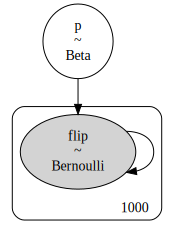

In [4]:
# Let's make a figure showing our model
pm.model_to_graphviz(bernoulli_model)

In [5]:
with bernoulli_model:
    # draw 500 posterior samples
    bernoulli_trace = pm.sample(draws=500, chains=10, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 2 jobs)
NUTS: [p]


Sampling 10 chains for 1_000 tune and 500 draw iterations (10_000 + 5_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.8788, but should be close to 0.8. Try to increase the number of tuning steps.


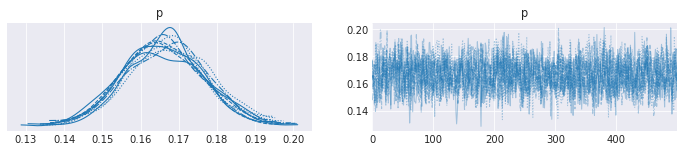

In [7]:
pm.plot_trace(bernoulli_trace);

What's going on here? Why is this taking so much computer time? [Markov chain monte carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) techniques!

(Discussion about how these Markov chain Monte Carlo techniques work.)

The left plot shows the distribution of the MCMC samples for each of two runs (two "chains" in MCMC terms). The right plot shows the series of simulated paramater values (the "trace") for each chain.

Much research has gone into making these techniques efficient and practical. In this class, we rely on PyMC3 to do the right thing and leave these (important) details for another time. Still, we do need to pay attention to warnings we get from PyMC3.

In [8]:
bernoulli_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

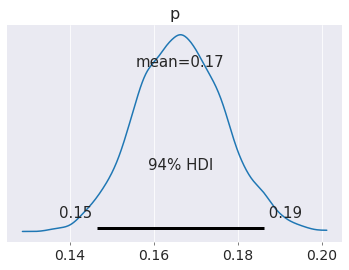

In [9]:
pm.plot_posterior(bernoulli_trace);

# A gaussian example

Remember our fish samples that we did previously? Let's analyze those data with a Bayesian approach.

In [10]:
sample_size = 300

true_mean = 10.0
true_variance = 4.0
true_std = np.sqrt(true_variance)

rng = np.random.RandomState(123)
fish_sample = rng.normal(loc=true_mean, scale=true_std, size=sample_size)

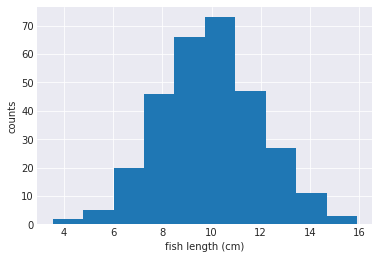

In [11]:
plt.hist(fish_sample)
plt.xlabel("fish length (cm)")
plt.ylabel("counts");

In [12]:
fish_model = pm.Model()

with fish_model:
    mu = pm.Normal('mu', mu=15.0, sigma=10.0)
    sigma = pm.Uniform('sd', lower=0.0, upper=100.0)
    Y_obs = pm.Normal('sample', mu=mu, sigma=sigma, observed=fish_sample)

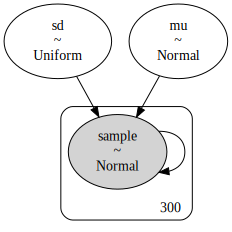

In [13]:
# Let's make a figure showing our model
pm.model_to_graphviz(fish_model)

In [14]:
with fish_model:
    # draw 500 posterior samples
    fish_trace = pm.sample(500, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sd]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 1 seconds.


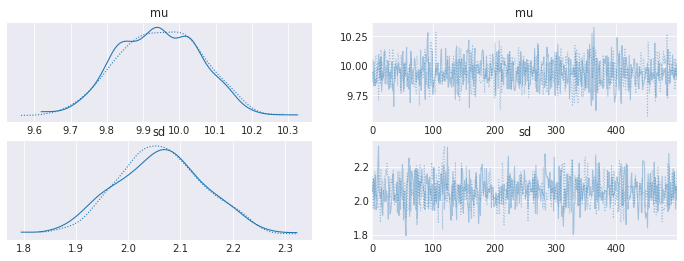

In [15]:
pm.plot_trace(fish_trace);

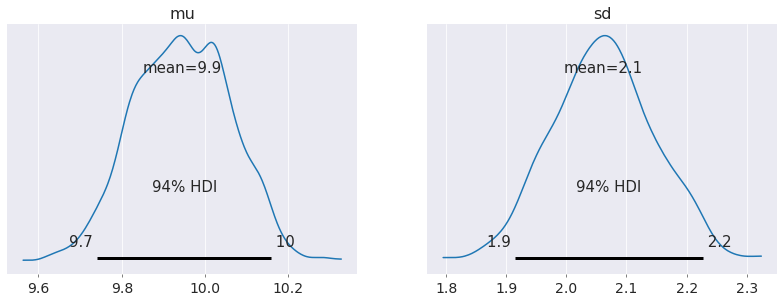

In [16]:
pm.plot_posterior(fish_trace);

Notice how this quantitatively (and visually) represents our certainty about the underlying parameters we are interested in, the mean ("mu") and standard deviation ("sd"). This is one of the great powers of the Bayesian inference methods - with a model, data and prior beliefs, we have a mathematical recipe for determining how we should update our beliefs.